## Programming for Data Science

### **Project 1**
**Group members:**
* Ghita Rholi, 20221491@novaims.unl.pt
* Mariana Ferreira, 20211637@novaims.unl.pt
* Mariana Neto, 20211527@novaims.unl.pt

### Step 5. Feature' joint discrimination

Assessment of joint features’ discrimination. The expected result of this step is to:

**1.** Gain preliminary insights about the respondents
<br>
**2.** Select prominent and non-redundant features for the next step

- **1.** Extracting a set of precise and representative characteristics of the respondents
    - **1.1.** Getting to know the numerical characteristics
        - **1.1.1.** Using monetary_value
        - **1.1.2.** Using frequency
        - **1.1.3.** Using percentage_purchases
        - **1.1.4.** Using NKids and NTeens
    - **1.2.** Getting to know the percentages' characteristics
        - **1.2.1** Separating the percentage features' values into bins
        - **1.2.2** Checking which is the most relevant percentage feature
        - **1.2.3** Associating percentage features
            - **1.2.3.1** PMntWines, PMntMeatProducts and PCatalogPurchases
            - **1.2.3.2** PMntFruits, PMntFishProducts, PCatalogPurchases
            - **1.2.3.3** PMntSweetProducts, PMntFruits, PMntFishProducts and PCatalogPurchases
            - **1.2.3.4** PMntMeatProducts, PMntSweetProducts, PMntFruits, PMntFishProducts, PCatalogPurchases
            - **1.2.3.5** PMntWines, PMntMeatProducts, PMntSweetProducts, PMntFruits, PMntFishProducts, PCatalogPurchases
    - **1.3** Multivariate Aggregation of Response on categorical features
        - **1.3.1** Education, MaritalStatus and HasChild
            - **1.3.1** Education, MaritalStatus and HasChild
            - **1.3.2** Pairs of Education, MaritalStatus and HasChild
- **2.** Dataframe respondents
- **3.** Maximum Possible Profit
- **4.** Exporting the dataframe

<br>

##### Imports the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# displays the plots in the notebook itself
%matplotlib inline

# Choose the color palette for seaborn
sns.set_style("whitegrid")
my_palette = ["grey", "red"]
my_palette = sns.color_palette(my_palette)

<br>

##### Loads the data.

In [2]:
data = pd.read_excel("after_explore1.xlsx", index_col = "ID")

<br>

### **1.** Extracting a set of precise and representative characteristics of the respondents 

In order to collect precise and representative characteristics of the features, are made some comparisons among multiple features, using ``groupby()`` and ``agg()``.

Prior to making those comparisons, it is useful to store the features from different categories in specific lists, which is performed in the cell below.

In [3]:
socio_demographic = ['Education', 'MaritalStatus', 'NKids', 'NTeens', 'HasChild']
monetary_value = ['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalMnt']
percentages_amount = ['PMntWines', 'PMntFruits', 'PMntMeatProducts', 'PMntFishProducts', 'PMntSweetProducts']
percentages_purchases = ['PWebPurchases', 'PCatalogPurchases', 'PStorePurchases']
frequency = ['NWebPurchases', 'NStorePurchases']
costumer_life = ['Complain', 'Recency']

<br>

#### **1.1** Getting to know the numerical characteristics

In order to find the relevant differences between customers, we will use data aggregation based on the features selected. 
The following function creates a dataframe containing the mean, standard deviation and the maximum of the chosen features for each value of the Response variable. This will allow the comparison between the features and the target, and understanding which characteristics may be more relevant. 

In [4]:
def columns_groupedby_target(columns, stats):
    # Feature used to group the data
    by_target = ['Response']  
    # Defining the aggregation dictionary, which will allow to define the features and compare them with by_target
    aggregation = {f: stats for f in columns}
    # Group by by_target 
    gb_object = data.groupby(by_target)
    # Uses .agg() method to join gb_object and aggregation
    df_agg = gb_object.agg(aggregation)
    display(df_agg.T)

<br>

##### **1.1.1** Using monetary_value 

To learn more about how the features stored in the list 'monetary_value' (MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds, and TotalMnt) behave for each value of the target, it is used the function the ``columns_groupedby_target()`` for those features, using the mean, standard deviation and count statistics. 

In [5]:
columns_groupedby_target(monetary_value, ['mean', 'std','count'])

Response                          0           1
MntFruits        mean     24.130708   38.690096
                 std      38.163832   46.516434
                 count  1752.000000  313.000000
MntFishProducts  mean     34.961187   50.996805
                 std      52.987447   61.221304
                 count  1752.000000  313.000000
MntSweetProducts mean     25.081050   39.124601
                 std      40.161912   46.836053
                 count  1752.000000  313.000000
MntGoldProds     mean     39.634703   62.092652
                 std      48.187077   57.435982
                 count  1752.000000  313.000000
TotalMnt         mean    499.030822  921.495208
                 std     529.210305  699.379295
                 count  1752.000000  313.000000

In [6]:
data[(data['TotalMnt']>921)].value_counts()

Education   CustomerDays  MaritalStatus  NKids  NTeens  HasChild  PMntWines  MntFruits  PMntFruits  PMntMeatProducts  MntFishProducts  PMntFishProducts  MntSweetProducts  PMntSweetProducts  MntGoldProds  TotalMnt  Complain  Recency  NWebPurchases  PWebPurchases  PCatalogPurchases  NStorePurchases  PStorePurchases  Response
PhD         1367          Widow          0      0       0         28.207307  194        16.482583   32.030586         149              12.659303         125               10.620221          57            1177      0         54       4              23.529412      35.294118          7                41.176471        0           2
Graduation  1286          Single         0      0       0         43.577545  81         7.706946    33.872502         106              10.085633         50                4.757374           40            1051      0         3        4              26.666667      26.666667          7                46.666667        0           2
PhD         193

<br>

In [7]:
columns_groupedby_target(monetary_value, ['mean', 'std','count'])

Response                          0           1
MntFruits        mean     24.130708   38.690096
                 std      38.163832   46.516434
                 count  1752.000000  313.000000
MntFishProducts  mean     34.961187   50.996805
                 std      52.987447   61.221304
                 count  1752.000000  313.000000
MntSweetProducts mean     25.081050   39.124601
                 std      40.161912   46.836053
                 count  1752.000000  313.000000
MntGoldProds     mean     39.634703   62.092652
                 std      48.187077   57.435982
                 count  1752.000000  313.000000
TotalMnt         mean    499.030822  921.495208
                 std     529.210305  699.379295
                 count  1752.000000  313.000000

<br>

To be able to visualize the dispersion of the considered features with regard to the target, it is generated a boxplot among this features and the respective target. This is possible by using the methods: ``groupby()``, ``boxplot()``, ``suptitle()`` and ``subplots_adjust()``, in the code below.

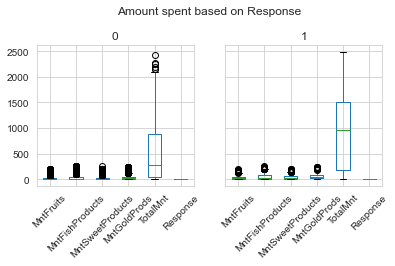

In [8]:
# Setting which features are being considered in the model
features = monetary_value
# Groupping the features by response and creating the boxplot
data[features + ["Response"]].groupby("Response").boxplot(layout=(1, 2), figsize=(6, 3), rot=45)
# Setting the title of the plot
plt.suptitle("Amount spent based on Response")
plt.subplots_adjust(top=0.8) 

<br>
From the table and the boxplot above it is observed that the group of customers who accepted the current campaign (corresponding to the Response equal to 1), tend to:

1.  Spend more in general (have a higher TotaMnt value), and in each specific feature that the TotalMNt is related to (MntFruits, MnFishProducts and MntSweetProducts);
2.  Spend significantly more in gold products (which is only noticable in the table).



<br>

##### **1.1.2** Using frequency 

To learn more about how the features stored in the list 'frequency' (NWebPurchases and NStorePurchases) behave for each value of the target, it is used the function ``columns_groupedby_target()`` for those features, using the mean, standard deviation and count statistics.

In [9]:
columns_groupedby_target(socio_demographic[2:4], ['mean', 'std','count'])

Response                0           1
NKids  mean      0.458333    0.335463
       std       0.543356    0.486274
       count  1752.000000  313.000000
NTeens mean      0.535959    0.303514
       std       0.544813    0.494087
       count  1752.000000  313.000000

<br>

To be able to visualize the dispersion of the considered features with regard to the target, it is generated, once again, a boxplot among this features and the respective target. This is possible by using the methods: ``groupby()``, ``boxplot()``, ``suptitle()`` and ``subplots_adjust()``, in the code below.

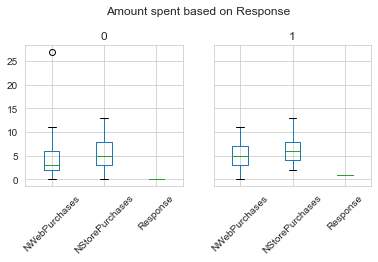

In [10]:
# Setting which features are being considered in the model
features = frequency
# Groupping the features by response and creating the boxplot
data[features + ["Response"]].groupby("Response").boxplot(layout=(1, 2), figsize=(6, 3), rot=45)
# Setting the title of the plot
plt.suptitle("Amount spent based on Response")
plt.subplots_adjust(top=0.8) 

<br>
From the given outputs (from the table and the boxplots above), there are some conclusions that can be reached, namely:

1.  Whether the response is 0 or 1, the NStorePurchases mean is higher than the NWebPurchases mean, which implies that there are more purchases occuring in stores then through the website;
2.  There are a larger amount of costumers that accept the campaign and make purchases in a store. This can also derive from the fact that there are more purchases occuring in stores. In order to get a clear conclusion on the values for In-Store Purchases and Web Purchases, it is best to use the corresponding percentages.

<br>


<br>

##### **1.1.3** Using percentage_purchases 

To learn more about how the features stored in the list 'percentage_purchases' (PWebPurchases, PCatalogPurchases and PStorePurchases) behave for each value of the target, it is used the function ``columns_groupedby_target()`` for those features, using the mean, standard deviation and count statistics.

The resulting values from this function may help us clear some doubts about the variables related to the In-store purchases and the Web purchases.

In [11]:
columns_groupedby_target(percentages_purchases, ['mean', 'std','count'])

Response                           0           1
PWebPurchases     mean     32.711720   34.522320
                  std      11.988316   11.929394
                  count  1752.000000  313.000000
PCatalogPurchases mean     15.044277   24.483989
                  std      13.711553   13.018590
                  count  1752.000000  313.000000
PStorePurchases   mean     52.244003   40.993691
                  std      14.724602   11.417988
                  count  1752.000000  313.000000

<br>
From the given table and the boxplots above, there are some conclusions that can be reached, namely:

1. The PWebPurchases has a slighly larger mean when Response is 1 than when it is 0. Therefore, there is a higher proportion of individuals that accept the campaign and buy products through the Website, than those who buy products through the website and do not accept the campaign.
2. The PCatalogPurchases has a significantly higher mean when Response is 1 than when it is 0. Hence, there is a larger amount of people that purchase products in a catalog and accept the campaign offer than those who do not.
3. The PStorePurchases has a significantly higher mean when Response is 0 than when it is 1. Thus, there is a larger amount of people that buy products in a store and do not accept the campaign offer than those that do so, knowing that they have purchased a product in a store.

<br>



##### **1.1.4** Using NKids and NTeens

To learn more about how the features NKids and NTeens behave for each value of the target, it is used the function ``columns_groupedby_target()`` for those features, using the mean, standard deviation and count statistics.

In [12]:
columns_groupedby_target(socio_demographic[2:4], ['mean', 'std','count'])

Response                0           1
NKids  mean      0.458333    0.335463
       std       0.543356    0.486274
       count  1752.000000  313.000000
NTeens mean      0.535959    0.303514
       std       0.544813    0.494087
       count  1752.000000  313.000000

In the table above, the values of the mean for the two columns (NKids and NTeens) express that those columns are more likely to have the value zero than any other. That is, it is more likely, overall, for a individual not to have either teens or kids.

To know if this reading of the values presented it is correct, in the code below it is calculated the mode for both columns.

In [13]:
print('Mode of NKids is :', data['NKids'].mode(),
      '\n\n',
      'Mode of NTeens is :', data['NTeens'].mode())

Mode of NKids is : 0    0
dtype: int64 

 Mode of NTeens is : 0    0
dtype: int64


With the information provided by the code above (the mode of both NKids and NTeens being 0), it is clear that the values in the previous table, regarding these features, express that the most common value for NKids and NTeens for any value of Response, is 0 (which implies that the corresponding individuals do not have children). However, the mean values of NKids and NTeens are slightly higher when Response is 0, which means that, it is more often for individuals to have children and respond negatively to the campaign offer, than for them to have children and respond positively to the campaign offer.

<br>


#### **1.2** Getting to know the percentages' characteristics




##### **1.2.1** Separating the percentage features' values into bins

In order to get a better understanding on the respective relation between percentage features and the Response, the following code, which separates the values of each one of those features into bins, was created.

In [14]:
# Creates a list containing the columns with floating numbers, in this case correponds to the columns of percentages
num_features = list(data.select_dtypes(include=["float"]).columns) 

# Divide the values in 5 different bins
n_bins, data_bin = 5, {}
for f in num_features:
    data_bin[f] = pd.qcut(data[f], q=n_bins, duplicates='drop')

# Add the target to the 
data_bin["Response"] = data["Response"]
data_bin = pd.DataFrame.from_dict(data_bin)
display(data_bin.shape, data_bin.head(3))

(2065, 9)

,PMntWines,PMntFruits,PMntMeatProducts,PMntFishProducts,PMntSweetProducts,PWebPurchases,PCatalogPurchases,PStorePurchases,Response
ID,,,,,,,,,
0,"(-0.001, 29.552]","(0.784, 2.439]","(40.063, 99.769]","(13.88, 75.0]","(4.954, 10.011]","(-0.001, 25.0]","(19.048, 28.0]","(52.941, 61.111]",0
1,"(75.0, 97.222]","(0.784, 2.439]","(-0.001, 16.115]","(1.188, 3.829]","(-0.001, 0.684]","(35.714, 42.857]","(12.5, 19.048]","(38.462, 46.429]",1
9,"(57.781, 75.0]","(-0.001, 0.784]","(31.25, 40.063]","(-0.001, 1.188]","(-0.001, 0.684]","(35.714, 42.857]","(28.0, 100.0]","(-0.001, 38.462]",0


<br>

To check how many unique values each of this transformed features have, it is printed in the code below the unique values of a each of those features, using ``.unique()``.

In [15]:
for feature in num_features:
    print(f'Unique values of {feature}:', data_bin[feature].unique(), 
         '\n\n')

Unique values of PMntWines: [(-0.001, 29.552], (75.0, 97.222], (57.781, 75.0], (29.552, 44.444], (44.444, 57.781]]
Categories (5, interval[float64]): [(-0.001, 29.552] < (29.552, 44.444] < (44.444, 57.781] < (57.781, 75.0] < (75.0, 97.222]] 


Unique values of PMntFruits: [(0.784, 2.439], (-0.001, 0.784], (2.439, 4.949], (9.677, 76.271], (4.949, 9.677]]
Categories (5, interval[float64]): [(-0.001, 0.784] < (0.784, 2.439] < (2.439, 4.949] < (4.949, 9.677] < (9.677, 76.271]] 


Unique values of PMntMeatProducts: [(40.063, 99.769], (-0.001, 16.115], (31.25, 40.063], (16.115, 23.465], (23.465, 31.25]]
Categories (5, interval[float64]): [(-0.001, 16.115] < (16.115, 23.465] < (23.465, 31.25] < (31.25, 40.063] < (40.063, 99.769]] 


Unique values of PMntFishProducts: [(13.88, 75.0], (1.188, 3.829], (-0.001, 1.188], (3.829, 7.624], (7.624, 13.88]]
Categories (5, interval[float64]): [(-0.001, 1.188] < (1.188, 3.829] < (3.829, 7.624] < (7.624, 13.88] < (13.88, 75.0]] 


Unique values of PMntSwee

With the output of this last cell, it is clear that, as desired, the features ha five unique values (bins), that correspond to a specific interval of values.

<br>

##### **1.2.2** Checking which is the most relevant percentage feature

In order to know which of the percentage features is the most relevant, it is necessary to compare them to the Response feature. Now that those features are in this new format, that comparison will be executed. To do that, it is performed in the next cell the computation of the average response rate, the number of customers in the corresponding bins and the number of individuals that accepted the campaign offer in those bins, for each feature.


In [16]:
# Large and representative thresholds
rate, count = 0, 1
# Setting the statistics as the mean, the sum and the count
stats = ["mean", "sum", "count"]
# Agregatting the target by each of the statistics
aggregation = {"Response": stats}
for nc in num_features:
    # Using the groupby function for columns aggregation
    gb_object = data_bin.groupby(nc)
    data_agg = gb_object.agg(aggregation)    
    data_agg = data_agg.sort_values(by=("Response", "mean"), ascending=False)
    # Conditional selection
    data_agg = data_agg.loc[(data_agg.loc[:, ("Response", "mean")] > rate) & (data_agg.loc[:, ("Response", "sum")] > count)]
    if len(data_agg > 0):
        display(data_agg)
        g_avg = data_agg.loc[:, ("Response", "mean")].mean()
        g_sum = data_agg.loc[:, ("Response", "count")].sum()
        print("Average response rate in the {} groups: {:.2f}".format(len(data_agg), g_avg))
        print("Number of customers in the {} groups: {}".format(len(data_agg), g_sum))
        print("Number of individuals that accepted the campaign offer in the {} groups: {:.0f}".format(len(data_agg), g_avg*g_sum))

Response          
                      mean sum count
PMntWines                           
(44.444, 57.781]  0.171149  70   409
(29.552, 44.444]  0.158273  66   417
(57.781, 75.0]    0.157143  66   420
(-0.001, 29.552]  0.154964  64   413
(75.0, 97.222]    0.115764  47   406

Average response rate in the 5 groups: 0.15
Number of customers in the 5 groups: 2065
Number of individuals that accepted the campaign offer in the 5 groups: 313


Response          
                     mean sum count
PMntFruits                         
(0.784, 2.439]   0.201439  84   417
(2.439, 4.949]   0.178922  73   408
(4.949, 9.677]   0.152174  63   414
(9.677, 76.271]  0.121359  50   412
(-0.001, 0.784]  0.103865  43   414

Average response rate in the 5 groups: 0.15
Number of customers in the 5 groups: 2065
Number of individuals that accepted the campaign offer in the 5 groups: 313


Response          
                      mean sum count
PMntMeatProducts                    
(40.063, 99.769]  0.232446  96   413
(31.25, 40.063]   0.167883  69   411
(-0.001, 16.115]  0.130751  54   413
(23.465, 31.25]   0.120482  50   415
(16.115, 23.465]  0.106538  44   413

Average response rate in the 5 groups: 0.15
Number of customers in the 5 groups: 2065
Number of individuals that accepted the campaign offer in the 5 groups: 313


Response          
                      mean sum count
PMntFishProducts                    
(1.188, 3.829]    0.203390  84   413
(3.829, 7.624]    0.186441  77   413
(7.624, 13.88]    0.145278  60   413
(-0.001, 1.188]   0.121065  50   413
(13.88, 75.0]     0.101695  42   413

Average response rate in the 5 groups: 0.15
Number of customers in the 5 groups: 2065
Number of individuals that accepted the campaign offer in the 5 groups: 313


Response          
                       mean sum count
PMntSweetProducts                    
(0.684, 2.564]     0.187952  78   415
(4.954, 10.011]    0.169492  70   413
(2.564, 4.954]     0.163017  67   411
(10.011, 95.62]    0.128329  53   413
(-0.001, 0.684]    0.108959  45   413

Average response rate in the 5 groups: 0.15
Number of customers in the 5 groups: 2065
Number of individuals that accepted the campaign offer in the 5 groups: 313


Response          
                      mean sum count
PWebPurchases                       
(42.857, 100.0]   0.183511  69   376
(25.0, 29.167]    0.179894  34   189
(35.714, 42.857]  0.154378  67   434
(29.167, 35.714]  0.138425  58   419
(-0.001, 25.0]    0.131376  85   647

Average response rate in the 5 groups: 0.16
Number of customers in the 5 groups: 2065
Number of individuals that accepted the campaign offer in the 5 groups: 325


Response           
                       mean  sum count
PCatalogPurchases                     
(28.0, 100.0]      0.304878  125   410
(19.048, 28.0]     0.171990   70   407
(12.5, 19.048]     0.165746   60   362
(-0.001, 12.5]     0.065463   58   886

Average response rate in the 4 groups: 0.18
Number of customers in the 4 groups: 2065
Number of individuals that accepted the campaign offer in the 4 groups: 366


Response           
                      mean  sum count
PStorePurchases                      
(-0.001, 38.462]  0.298122  127   426
(38.462, 46.429]  0.207921   84   404
(46.429, 52.941]  0.143902   59   410
(52.941, 61.111]  0.074699   31   415
(61.111, 100.0]   0.029268   12   410

Average response rate in the 5 groups: 0.15
Number of customers in the 5 groups: 2065
Number of individuals that accepted the campaign offer in the 5 groups: 311


<br>
Looking at the results for each feature, it is clear that the most relevant one for the model is the PCatalogPurchases with an average response rate of 0.18, the highest among the features considered. Therefore, this feature will be further considered when checking for associations between multiple features.

<br>

##### **1.2.3** Associating percentage features

Now, we can start associating this percentage features among each other and note if some association results in a desirable value regarding the target. And, as we observed that the most relevant feature among the percentage purchase features (PStoresPurchases, PWebPurchases and PCatalogPurchases) is the PCatalogPurchases, this feature will be used for this process and will be associated with the features corresponding to the percentage amount of money spent (PMntWines, PMntMeatProducts, PMntSweetProducts, PMntFruits, PMntFishProducts, PCatalogPurchases).

To do that, it is used ,in the cell below, the function ``percentages_association()`` that receives the columns that will be used to execute the ``.groupby()`` method and the statistics used in the aggregation. This function returns a daframe with respective columns associated with the mean, the sum and the count of the elements of the target.

In [17]:
def percentages_association(by_columns, statistics):
    # Large and representative thresholds
    rate, count = -1, 1
    # Group by
    gb_obj = data_bin.groupby(by_columns)
    # Aggregate Churn 
    data_agg = gb_obj.agg({"Response": stats})
    # Subset large
    churn_large = data_agg.loc[:, ("Response", "mean")] > rate
    # Subset relevant
    churn_relevant = data_agg.loc[:, ("Response", "count")] > count

    data_agg = data_agg.loc[churn_large & churn_relevant, :]
    return data_agg

<br>

**1.2.3.1 PMntWines, PMntMeatProducts and PCatalogPurchases**
 
The dataframe returned by the usage of the function ``percentages_association()`` is stored in a variable named 'percentage_association'. Then, the values of the mean within that dataframe are conditioned to be larger than 0.4, in the code below, since we only need to know about the larger values.

In [18]:
percentage_association = percentages_association(['PMntWines', 'PMntMeatProducts', 'PCatalogPurchases'], ['mean', 'sum','count'])

percentage_association[percentage_association.loc[:, ('Response', 'mean')]> 0.4]

Response          
                                                         mean sum count
PMntWines        PMntMeatProducts PCatalogPurchases                    
(-0.001, 29.552] (-0.001, 16.115] (28.0, 100.0]      0.500000   1     2
(44.444, 57.781] (40.063, 99.769] (19.048, 28.0]     0.555556   5     9
(57.781, 75.0]   (-0.001, 16.115] (28.0, 100.0]      0.500000   7    14

In the table above, the top three values of the association between the features PMntWines, PMntMeatProducts and PCatalogPurchases, relative to the target, are represented. 

The highest value is achieved with the PMntWines in the interval (44.444, 57.781], the PMntMeatProducts in (40.063, 99.769]	 and the PCatalogPurchases in (19.048, 28.0]. This value corresponds to 0.555556 and is the mean value of the Response feature of the other three features considered. Thus, more than half of the individuals (approximately 55%) that spent between 44MU (monetary units) and 57MU on Wine, between 40MU and 99.769MU on meat products and between 19MU and 28MU through a catalog, accepted the campaign offer.

<br>

**1.2.3.2 PMntFruits, PMntFishProducts, PCatalogPurchases**
 
The dataframe returned by the usage of the function ``percentages_association()`` is stored in a variable named 'percentage_association'. Then, the values of the mean within that dataframe are conditioned to be larger than 0.7 (choosen manually, after different trials), in the code below, since we only need to know about the larger values.


In [19]:
percentage_association = percentages_association(['PMntFruits', 'PMntFishProducts','PCatalogPurchases'], ['mean', 'sum','count'])

percentage_association[percentage_association.loc[:, ('Response', 'mean')]> 0.7]

Response          
                                                      mean sum count
PMntFruits     PMntFishProducts PCatalogPurchases                   
(2.439, 4.949] (-0.001, 1.188]  (28.0, 100.0]         0.75   3     4

The highest association among the different features, relatively to the target, is 0.75, which is a somewhat desirable value. This means that the individuals that spent within the intervals represented in the table above on fruit and fish using a catalog, are almost always the ones that respond positively to the campaign.

<br>
The cell bellow indicates the rows that have the values indicated above. This will allow to identify the respondents by their number ID, and therefore, create the dataframe of the respondents.

In [20]:
display(data.loc[((data["PMntFruits"]> 2.439) & (data["PMntFruits"]<= 4.949)) & ((data["PMntFishProducts"]> -0.001) & (data["PMntFishProducts"]<= 1.188)) & ((data["PCatalogPurchases"]>28.0) & (data["PCatalogPurchases"]<= 100.0)), :])
df_ = data.loc[((data["PMntFruits"]> 2.439) & (data["PMntFruits"]<= 4.949)) & ((data["PMntFishProducts"]> -0.001) & (data["PMntFishProducts"]<= 1.188)) & ((data["PCatalogPurchases"]>28.0) & (data["PCatalogPurchases"]<= 100.0)), :]
display(df_['Response'].value_counts(normalize = False))
df_['Response'].value_counts(normalize = True)

,Education,CustomerDays,MaritalStatus,NKids,NTeens,HasChild,PMntWines,MntFruits,PMntFruits,PMntMeatProducts,...,MntGoldProds,TotalMnt,Complain,Recency,NWebPurchases,PWebPurchases,PCatalogPurchases,NStorePurchases,PStorePurchases,Response
ID,,,,,,,,,,,,,,,,,,,,,
3945,PhD,1758,Widow,0,1,1,69.127517,44,4.921700,24.049217,...,36,894,0,80,11,47.826087,34.782609,4,17.391304,1
7832,Master,1587,Married,0,1,1,64.032698,44,2.997275,26.975477,...,58,1468,0,30,8,36.363636,31.818182,7,31.818182,1
7872,PhD,1937,Married,0,0,0,36.234818,21,4.251012,55.263158,...,63,494,0,7,6,27.272727,45.454545,6,27.272727,1
9952,Master,1482,Single,0,0,0,33.607306,32,2.922374,58.356164,...,10,1095,0,53,4,25.000000,43.750000,5,31.250000,0


1    3
0    1
Name: Response, dtype: int64

1    0.75
0    0.25
Name: Response, dtype: float64

<br>

**1.2.3.3 PMntSweetProducts, PMntFruits, PMntFishProducts and PCatalogPurchases**

 
The dataframe returned by the usage of the function ``percentages_association()`` is stored in a variable named 'percentage_association'. Then, the values of the mean within that dataframe are conditioned to be larger than 0.7, in the code below, since we only need to know about the larger values.


In [40]:
percentage_association = percentages_association(['PMntSweetProducts','PMntFruits', 'PMntFishProducts','PCatalogPurchases'], ['mean', 'sum','count'])

percentage_association[percentage_association.loc[:, ('Response', 'mean')]> 0.7]

Response  \
                                                                         mean   
PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases            
(-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.829]   (12.5, 19.048]         1.0   
                  (4.949, 9.677]  (7.624, 13.88]   (28.0, 100.0]          1.0   
(0.684, 2.564]    (0.784, 2.439]  (-0.001, 1.188]  (28.0, 100.0]          0.8   
                                  (13.88, 75.0]    (28.0, 100.0]          1.0   
                  (9.677, 76.271] (1.188, 3.829]   (12.5, 19.048]         1.0   
                                                   (19.048, 28.0]         1.0   
(2.564, 4.954]    (4.949, 9.677]  (13.88, 75.0]    (28.0, 100.0]          1.0   
(4.954, 10.011]   (9.677, 76.271] (3.829, 7.624]   (12.5, 19.048]         1.0   
                                                   (19.048, 28.0]         1.0   

                                                                          \
                                                                     sum   
PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases       
(-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.829]   (12.5, 19.048]      3   
                  (4.949, 9.677]  (7.624, 13.88]   (28.0, 100.0]       2   
(0.684, 2.564]    (0.784, 2.439]  (-0.001, 1.188]  (28.0, 100.0]       4   
                                  (13.88, 75.0]    (28.0, 100.0]       2   
                  (9.677, 76.271] (1.188, 3.829]   (12.5, 19.048]      2   
                                                   (19.048, 28.0]      2   
(2.564, 4.954]    (4.949, 9.677]  (13.88, 75.0]    (28.0, 100.0]       2   
(4.954, 10.011]   (9.677, 76.271] (3.829, 7.624]   (12.5, 19.048]      2   
                                                   (19.048, 28.0]      2   

                                                                            \
                                                                     count   
PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases         
(-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.829]   (12.5, 19.048]        3   
                  (4.949, 9.677]  (7.624, 13.88]   (28.0, 100.0]         2   
(0.684, 2.564]    (0.784, 2.439]  (-0.001, 1.188]  (28.0, 100.0]         5   
                                  (13.88, 75.0]    (28.0, 100.0]         2   
                  (9.677, 76.271] (1.188, 3.829]   (12.5, 19.048]        2   
                                                   (19.048, 28.0]        2   
(2.564, 4.954]    (4.949, 9.677]  (13.88, 75.0]    (28.0, 100.0]         2   
(4.954, 10.011]   (9.677, 76.271] (3.829, 7.624]   (12.5, 19.048]        2   
                                                   (19.048, 28.0]        2   

                                                                       Index  \
                                                                         min   
PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases           
(-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.829]   (12.5, 19.048]     3678.0   
                  (4.949, 9.677]  (7.624, 13.88]   (28.0, 100.0]      1745.0   
(0.684, 2.564]    (0.784, 2.439]  (-0.001, 1.188]  (28.0, 100.0]      1139.0   
                                  (13.88, 75.0]    (28.0, 100.0]      5302.0   
                  (9.677, 76.271] (1.188, 3.829]   (12.5, 19.048]     2452.0   
                                                   (19.048, 28.0]     3667.0   
(2.564, 4.954]    (4.949, 9.677]  (13.88, 75.0]    (28.0, 100.0]      2426.0   
(4.954, 10.011]   (9.677, 76.271] (3.829, 7.624]   (12.5, 19.048]     7381.0   
                                                   (19.048, 28.0]     6931.0   

                                                                               
                                                                          max  
PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases           
(-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.8

The highest association among the different features, relatively to the target, is 1, which is a perfect value. This means that all the individuals that spent within the intervals represented in the table above on sweet, fruit and fish using a catalog, accepted the campaign offer. These values will be considered when deciding on the rules that most successfully predict which individuals will accept the campaign.

<br>
Displays a dataframe of the respondents who have the below characteristics, in order to identify those who accepted and not accepted the campaign. 

In [22]:
display(data.loc[((data["PMntSweetProducts"]> 0.684) & (data["PMntSweetProducts"]<= 2.564)) & ((data["PMntFruits"]> 0.784) & (data["PMntFruits"]<= 2.439)) & ((data["PMntFishProducts"]>-0.001) & (data["PMntFishProducts"]<= 1.188)) & ((data["PCatalogPurchases"]>28.0) & (data["PCatalogPurchases"]<= 100.0)), :])
df_ = data.loc[((data["PMntSweetProducts"]> 0.684) & (data["PMntSweetProducts"]<= 2.564)) & ((data["PMntFruits"]> 0.784) & (data["PMntFruits"]<= 2.439)) & ((data["PMntFishProducts"]>-0.001) & (data["PMntFishProducts"]<= 1.188)) & ((data["PCatalogPurchases"]>28.0) & (data["PCatalogPurchases"]<= 100.0)), :]
display(df_['Response'].value_counts(normalize = False))
df_['Response'].value_counts(normalize = True)

,Education,CustomerDays,MaritalStatus,NKids,NTeens,HasChild,PMntWines,MntFruits,PMntFruits,PMntMeatProducts,...,MntGoldProds,TotalMnt,Complain,Recency,NWebPurchases,PWebPurchases,PCatalogPurchases,NStorePurchases,PStorePurchases,Response
ID,,,,,,,,,,,,,,,,,,,,,
1139,PhD,1425,Married,0,0,0,75.000000,14,1.000000,23.000000,...,112,1400,0,56,5,23.809524,52.380952,5,23.809524,1
2942,Graduation,1700,Single,0,1,1,89.181287,3,0.877193,7.894737,...,144,342,0,20,5,38.461538,30.769231,4,30.769231,0
5547,PhD,1608,Married,0,0,0,77.019281,19,0.990099,21.000521,...,0,1919,0,9,7,36.842105,31.578947,6,31.578947,1
6379,Master,1678,Widow,1,1,1,74.444444,1,1.111111,22.222222,...,31,90,0,3,2,33.333333,33.333333,2,33.333333,1
9703,PhD,1904,Married,1,1,1,66.956522,2,1.739130,30.434783,...,69,115,0,70,3,42.857143,28.571429,2,28.571429,1


1    4
0    1
Name: Response, dtype: int64

1    0.8
0    0.2
Name: Response, dtype: float64

<br>

**1.2.3.4 PMntMeatProducts, PMntSweetProducts, PMntFruits, PMntFishProducts, PCatalogPurchases**

The dataframe returned by the usage of the function ``percentages_association()`` is stored in a variable named 'percentage_association'. Then, the values of the mean within that dataframe are conditioned to be larger than 0.7, in the code below, since we only need to know about the larger values.


In [41]:
percentage_association = percentages_association(['PMntMeatProducts','PMntSweetProducts','PMntFruits', 'PMntFishProducts','PCatalogPurchases'], ['mean', 'sum','count'])

percentage_association[percentage_association.loc[:, ('Response', 'mean')]> 0.7]

Response  \
                                                                                          mean   
PMntMeatProducts PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases            
(-0.001, 16.115] (-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.829]   (12.5, 19.048]        1.00   
                 (4.954, 10.011]   (2.439, 4.949]  (3.829, 7.624]   (28.0, 100.0]         1.00   
(16.115, 23.465] (0.684, 2.564]    (0.784, 2.439]  (-0.001, 1.188]  (28.0, 100.0]         1.00   
                 (2.564, 4.954]    (0.784, 2.439]  (1.188, 3.829]   (19.048, 28.0]        1.00   
(31.25, 40.063]  (0.684, 2.564]    (0.784, 2.439]  (3.829, 7.624]   (28.0, 100.0]         1.00   
                                                   (7.624, 13.88]   (28.0, 100.0]         1.00   
                                   (2.439, 4.949]  (1.188, 3.829]   (28.0, 100.0]         1.00   
                 (2.564, 4.954]    (4.949, 9.677]  (7.624, 13.88]   (28.0, 100.0]         1.00   
(40.063, 99.769] (-0.001, 0.684]   (-0.001, 0.784] (-0.001, 1.188]  (19.048, 28.0]        1.00   
                 (0.684, 2.564]    (0.784, 2.439]  (1.188, 3.829]   (19.048, 28.0]        1.00   
                                   (4.949, 9.677]  (3.829, 7.624]   (28.0, 100.0]         0.75   
                                   (9.677, 76.271] (1.188, 3.829]   (19.048, 28.0]        1.00   
                 (2.564, 4.954]    (2.439, 4.949]  (-0.001, 1.188]  (19.048, 28.0]        1.00   
                 (4.954, 10.011]   (0.784, 2.439]  (1.188, 3.829]   (28.0, 100.0]         1.00   
                                                   (3.829, 7.624]   (-0.001, 12.5]        1.00   
                                                   (7.624, 13.88]   (28.0, 100.0]         1.00   
                                   (2.439, 4.949]  (7.624, 13.88]   (12.5, 19.048]        1.00   

                                                                                           \
                                                                                      sum   
PMntMeatProducts PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases       
(-0.001, 16.115] (-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.829]   (12.5, 19.048]      2   
                 (4.954, 10.011]   (2.439, 4.949]  (3.829, 7.624]   (28.0, 100.0]       2   
(16.115, 23.465] (0.684, 2.564]    (0.784, 2.439]  (-0.001, 1.188]  (28.0, 100.0]       3   
                 (2.564, 4.954]    (0.784, 2.439]  (1.188, 3.829]   (19.048, 28.0]      2   
(31.25, 40.063]  (0.684, 2.564]    (0.784, 2.439]  (3.829, 7.624]   (28.0, 100.0]       2   
                                                   (7.624, 13.88]   (28.0, 100.0]       2   
                                   (2.439, 4.949]  (1.188, 3.829]   (28.0, 100.0]       2   
                 (2.564, 4.954]    (4.949, 9.677]  (7.624, 13.88]   (28.0, 100.0]       2   
(40.063, 99.769] (-0.001, 0.684]   (-0.001, 0.784] (-0.001, 1.188]  (19.048, 28.0]      2   
                 (0.684, 2.564]    (0.784, 2.439]  (1.188, 3.829]   (19.048, 28.0]      2   
                                   (4.949, 9.677]  (3.829, 7.624]   (28.0, 100.0]       3   
                                   (9.677, 76.271] (1.188, 3.829]   (19.048, 28.0]      2   
                 (2.564, 4.954]    (2.439, 4.949]  (-0.001, 1.188]  (19.048, 28.0]      2   
                 (4.954, 10.011]   (0.784, 2.439]  (1.188, 3.829]   (28.0, 100.0]       2   
                                                   (3.829, 7.624]   (-0.001, 12.5]      2   
                                                   (7.624, 13.88]   (28.0, 100.0]       2   
                                   (2.439, 4.949]  (7.624, 13.88]   (12.5, 19.048]      2   

                                                                                             \
                                                                                      count   
PMntMeatProducts PMntSweetProducts PMntFruits      PMntFishProducts PCatal

Once again, the highest association among the different features, relatively to the target, is 1, which is a perfect value. This means that all the individuals that spent within the intervals represented in the table above on meat, sweet, fruit and fish using a catalog, accepted the campaign offer. These values will be considered when deciding on the rules that most successfully predict which individuals will accept the campaign.

<br>
Displays a dataframe of the respondents who have the below characteristics. These IDs will allow the creation of the dataframe of the respondents.

In [24]:
display(data.loc[(data["PMntMeatProducts"]>40.063) &(data["PMntMeatProducts"]<=99.769) & (data["PMntSweetProducts"]>0.684) &(data["PMntSweetProducts"]<=2.564)& (data["PMntFruits"]>4.949) &(data["PMntFruits"]<= 9.677) & (data["PMntFishProducts"]>3.829) &(data["PMntFishProducts"]<=7.624)])
df_ = data.loc[(data["PMntMeatProducts"]>40.063) &(data["PMntMeatProducts"]<=99.769) & (data["PMntSweetProducts"]>0.684) &(data["PMntSweetProducts"]<=2.564)& (data["PMntFruits"]>4.949) &(data["PMntFruits"]<= 9.677) & (data["PMntFishProducts"]>3.829) &(data["PMntFishProducts"]<=7.624)]
display(df_['Response'].value_counts(normalize = False))
df_['Response'].value_counts(normalize = True)

,Education,CustomerDays,MaritalStatus,NKids,NTeens,HasChild,PMntWines,MntFruits,PMntFruits,PMntMeatProducts,...,MntGoldProds,TotalMnt,Complain,Recency,NWebPurchases,PWebPurchases,PCatalogPurchases,NStorePurchases,PStorePurchases,Response
ID,,,,,,,,,,,,,,,,,,,,,
1859,Master,1953,Married,0,0,0,38.514957,111,5.929487,49.412393,...,18,1872,0,34,7,38.888889,33.333333,5,27.777778,1
5929,PhD,1336,Married,1,0,1,42.222222,3,6.666667,42.222222,...,3,45,0,14,2,40.000000,0.000000,3,60.000000,0
7279,PhD,1554,Single,0,0,0,26.612078,86,8.802456,57.215967,...,67,977,0,3,4,28.571429,42.857143,4,28.571429,0
8908,Graduation,1334,Married,0,0,0,20.491029,76,7.176582,65.155807,...,38,1059,0,35,3,15.789474,57.894737,5,26.315789,1
8975,Graduation,1436,Married,1,1,1,34.146341,3,7.317073,51.219512,...,28,41,0,47,3,50.000000,16.666667,2,33.333333,0
9671,Graduation,1436,Married,1,1,1,34.146341,3,7.317073,51.219512,...,28,41,0,47,3,50.000000,16.666667,2,33.333333,1
10530,PhD,1486,Widow,0,0,0,40.891841,82,7.779886,41.840607,...,102,1054,0,0,3,20.000000,40.000000,6,40.000000,1
11010,PhD,1585,Single,1,0,1,43.181818,3,6.818182,40.909091,...,0,44,0,75,3,50.000000,0.000000,3,50.000000,0


0    4
1    4
Name: Response, dtype: int64

0    0.5
1    0.5
Name: Response, dtype: float64

<br>


**1.2.3.5 PMntWines, PMntMeatProducts, PMntSweetProducts, PMntFruits, PMntFishProducts, PCatalogPurchases**

The dataframe returned by the usage of the function ``percentages_association()`` is stored in a variable named 'percentage_association'. Then, the values of the mean within that dataframe are conditioned to be larger than 0.7, in the code below, since we only need to know about the larger values.


In [25]:
def percentages_association(by_columns, statistics):
    # Large and representative thresholds
    rate, count = -1, 1
    # Group by
    data_bin['Index'] = data.index
    gb_obj = data_bin.groupby(by_columns)
    # Aggregate Churn 
    data_agg = gb_obj.agg({"Response": stats, 'Index': ['min', 'max']})
    # Subset large
    churn_large = data_agg.loc[:, ("Response", "mean")] > rate
    # Subset relevant
    churn_relevant = data_agg.loc[:, ("Response", "count")] > count

    data_agg = data_agg.loc[churn_large & churn_relevant, :]
    return data_agg

In [26]:
percentage_association = percentages_association(['PMntWines','PMntMeatProducts','PMntSweetProducts','PMntFruits', 'PMntFishProducts','PCatalogPurchases'], ['mean', 'sum','count'])

percentage_association[percentage_association.loc[:, ('Response', 'mean')]> 0.7]

Response  \
                                                                                                           mean   
PMntWines        PMntMeatProducts PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases            
(-0.001, 29.552] (40.063, 99.769] (2.564, 4.954]    (2.439, 4.949]  (-0.001, 1.188]  (19.048, 28.0]        1.00   
                                  (4.954, 10.011]   (9.677, 76.271] (-0.001, 1.188]  (-0.001, 12.5]        1.00   
(29.552, 44.444] (31.25, 40.063]  (4.954, 10.011]   (2.439, 4.949]  (7.624, 13.88]   (-0.001, 12.5]        0.75   
                 (40.063, 99.769] (0.684, 2.564]    (4.949, 9.677]  (3.829, 7.624]   (28.0, 100.0]         1.00   
                                  (4.954, 10.011]   (0.784, 2.439]  (3.829, 7.624]   (-0.001, 12.5]        1.00   
                                                    (2.439, 4.949]  (7.624, 13.88]   (12.5, 19.048]        1.00   
(44.444, 57.781] (31.25, 40.063]  (0.684, 2.564]    (0.784, 2.439]  (3.829, 7.624]   (28.0, 100.0]         1.00   
                                                                    (7.624, 13.88]   (28.0, 100.0]         1.00   
                 (40.063, 99.769] (-0.001, 0.684]   (-0.001, 0.784] (-0.001, 1.188]  (19.048, 28.0]        1.00   
                                  (0.684, 2.564]    (2.439, 4.949]  (3.829, 7.624]   (28.0, 100.0]         1.00   
(57.781, 75.0]   (-0.001, 16.115] (4.954, 10.011]   (2.439, 4.949]  (3.829, 7.624]   (28.0, 100.0]         1.00   
                 (16.115, 23.465] (0.684, 2.564]    (0.784, 2.439]  (-0.001, 1.188]  (28.0, 100.0]         1.00   
                                                                    (1.188, 3.829]   (19.048, 28.0]        1.00   
(75.0, 97.222]   (-0.001, 16.115] (-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.829]   (12.5, 19.048]        1.00   

                                                                                                            \
                                                                                                       sum   
PMntWines        PMntMeatProducts PMntSweetProducts PMntFruits      PMntFishProducts PCatalogPurchases       
(-0.001, 29.552] (40.063, 99.769] (2.564, 4.954]    (2.439, 4.949]  (-0.001, 1.188]  (19.048, 28.0]      2   
                                  (4.954, 10.011]   (9.677, 76.271] (-0.001, 1.188]  (-0.001, 12.5]      2   
(29.552, 44.444] (31.25, 40.063]  (4.954, 10.011]   (2.439, 4.949]  (7.624, 13.88]   (-0.001, 12.5]      3   
                 (40.063, 99.769] (0.684, 2.564]    (4.949, 9.677]  (3.829, 7.624]   (28.0, 100.0]       2   
                                  (4.954, 10.011]   (0.784, 2.439]  (3.829, 7.624]   (-0.001, 12.5]      2   
                                                    (2.439, 4.949]  (7.624, 13.88]   (12.5, 19.048]      2   
(44.444, 57.781] (31.25, 40.063]  (0.684, 2.564]    (0.784, 2.439]  (3.829, 7.624]   (28.0, 100.0]       2   
                                                                    (7.624, 13.88]   (28.0, 100.0]       2   
                 (40.063, 99.769] (-0.001, 0.684]   (-0.001, 0.784] (-0.001, 1.188]  (19.048, 28.0]      2   
                                  (0.684, 2.564]    (2.439, 4.949]  (3.829, 7.624]   (28.0, 100.0]       2   
(57.781, 75.0]   (-0.001, 16.115] (4.954, 10.011]   (2.439, 4.949]  (3.829, 7.624]   (28.0, 100.0]       2   
                 (16.115, 23.465] (0.684, 2.564]    (0.784, 2.439]  (-0.001, 1.188]  (28.0, 100.0]       2   
                                                                    (1.188, 3.829]   (19.048, 28.0]      3   
(75.0, 97.222]   (-0.001, 16.115] (-0.001, 0.684]   (2.439, 4.949]  (1.188, 3.829]   (12.5, 19.048]      2   

                                                                                                              \
                                                                                                       count   
PMntWines        PMntMeatProducts PMntSweetProducts 

By using all the features corresponding to the percentage amount of money spent, the highest association among the different features, relatively to the target, is 1, which is a perfect value. This means that all the individuals that spent within the intervals represented in the table above on wine, meat, sweet, fruit and fish using a catalog, accepted the campaign offer. These values will be considered when deciding on the rules that most successfully predict which individuals will accept the campaign.

<br>
Displays a dataframe of some characteristics of the respondents.

In [27]:
display(data.loc[(data["PMntWines"]>-0.001) &(data["PMntWines"]<=29.552) & (data["PMntMeatProducts"]>40.063) & (data["PMntMeatProducts"]<=99.769) & (data["PMntSweetProducts"]>2.564) &(data["PMntSweetProducts"]<=4.954)& (data["PMntFruits"]>2.439) &(data["PMntFruits"]<=4.949) & (data["PMntFishProducts"]>-0.001) &(data["PMntFishProducts"]<=1.188)])
df_ = data.loc[(data["PMntWines"]>-0.001) &(data["PMntWines"]<=29.552) & (data["PMntMeatProducts"]>40.063) & (data["PMntMeatProducts"]<=99.769) & (data["PMntSweetProducts"]>2.564) &(data["PMntSweetProducts"]<=4.954)& (data["PMntFruits"]>2.439) &(data["PMntFruits"]<=4.949) & (data["PMntFishProducts"]>-0.001) &(data["PMntFishProducts"]<=1.188)]
display(df_['Response'].value_counts(normalize = False))
df_['Response'].value_counts(normalize = True)

,Education,CustomerDays,MaritalStatus,NKids,NTeens,HasChild,PMntWines,MntFruits,PMntFruits,PMntMeatProducts,...,MntGoldProds,TotalMnt,Complain,Recency,NWebPurchases,PWebPurchases,PCatalogPurchases,NStorePurchases,PStorePurchases,Response
ID,,,,,,,,,,,,,,,,,,,,,
3520,Master,1741,Single,0,0,0,15.637066,28,2.702703,78.957529,...,56,1036,0,94,4,28.571429,21.428571,7,50.000000,1
4756,2n Cycle,1473,Divorced,0,0,0,16.666667,29,2.746212,77.462121,...,112,1056,0,42,7,29.166667,25.000000,11,45.833333,1


1    2
Name: Response, dtype: int64

1    1.0
Name: Response, dtype: float64

<br>

### 1.3 Multivariate Aggregation of Response on categorical features

In the steps performed above, we focused on numerical numerical, aggregating it by groups and associating those values to the target. Thus, the function created below (``categorical_associations()``), combines potential representative categorical features. To accomplish that, the respective function takes as parameters the columns to be associated relatively to the target, and the statistics to be performed on the target.

Right before creating the function ``categorical_associations()``, it is stored the categorical column names in a list named 'categorical_columns'. The feature HasChild is considered as categorical, since their values (1 and 0) correspond to categorical notions (having at least one child and having no children, respectively).

In [30]:
categorical_columns = ['Education', 'MaritalStatus', 'HasChild']

In [31]:
def categorical_associations(by_columns,stats):
    # Large and representative thresholds
    rate, count = 0, 1
    # Group by the columns
    gb_obj = data.groupby(by_columns)
    # Aggregate Target 
    data_agg = gb_obj.agg({"Response": stats})
    # Subset large
    target_large = data_agg.loc[:, ("Response", "mean")] > rate
    # Subset relevant
    target_relevant = data_agg.loc[:, ("Response", "count")] > count
    data_agg = data_agg.loc[target_large & target_relevant, :]
    return data_agg
    

<br>

**1.3.1 Education, MaritalStatus and HasChild**

The dataframe returned by the usage of the function ``categorical_associations()`` is stored in a variable named 'categorical_association'. Then, the values of the mean within that dataframe are conditioned to be larger than 0.7 (choosen manually, after different trials), in the code below, since we only need to know about the larger values.

In [32]:
categorical_association = categorical_associations(['Education','MaritalStatus','HasChild'], ["mean", "sum", "count"])
categorical_association[categorical_association.loc[:, ('Response', 'mean')] > 0.7]

Response          
                                     mean sum count
Education MaritalStatus HasChild                   
Master    Widow         0             0.8   4     5

The highest association among the different features, relatively to the target, is 0.8, which is somewhat desirable value. This means that the individuals that have a master's degree, are widows and do not have any children, accepted the campaign's offer in the majority of times.



<br>
Displays a dataframe of the respondents who have the below characteristics.

In [33]:
display(data.loc[(data["Education"]== "Master") & (data["MaritalStatus"]== "Widow") & (data["HasChild"]==0),:])
df_ = data.loc[(data["Education"]== "Master") & (data["MaritalStatus"]== "Widow") & (data["HasChild"]==0), :]
display(df_['Response'].value_counts(normalize = False))
df_['Response'].value_counts(normalize = True)

,Education,CustomerDays,MaritalStatus,NKids,NTeens,HasChild,PMntWines,MntFruits,PMntFruits,PMntMeatProducts,...,MntGoldProds,TotalMnt,Complain,Recency,NWebPurchases,PWebPurchases,PCatalogPurchases,NStorePurchases,PStorePurchases,Response
ID,,,,,,,,,,,,,,,,,,,,,
3766,Master,1964,Widow,0,0,0,16.233766,71,11.525974,39.448052,...,219,616,0,15,9,50.000000,5.555556,8,44.444444,1
4530,Master,1895,Widow,0,0,0,54.241071,19,1.060268,33.203125,...,138,1792,0,36,3,15.000000,35.000000,10,50.000000,1
4587,Master,1628,Widow,0,0,0,63.281250,25,9.765625,20.703125,...,10,256,0,90,3,27.272727,9.090909,7,63.636364,0
5250,Master,1524,Widow,0,0,0,36.995828,126,8.762170,34.075104,...,126,1438,0,75,5,23.809524,23.809524,11,52.380952,1
6906,Master,1673,Widow,0,0,0,17.542017,48,5.042017,63.235294,...,72,952,0,73,3,17.647059,58.823529,4,23.529412,1


1    4
0    1
Name: Response, dtype: int64

1    0.8
0    0.2
Name: Response, dtype: float64

<br>

<br>

**1.3.2 Pairs of Education, MaritalStatus and HasChild**

The dataframe returned by the usage of the function ``categorical_associations()`` is stored in a variable named 'categorical_association'. Then, the values of the mean within that dataframe are conditioned to be larger than 0.7 (choosen manually, after different trials), in the code below, since we only need to know about the larger values. 

In this part, the mentioned function is executed for every possible pair among the features: Education, MaritalStatus and HasChild, which is displayed in the cells below.

In [34]:
categorical_association = categorical_associations(['Education','MaritalStatus'], ["mean", "sum", "count"])
display('Pair Education and MaritalStatus:', categorical_association[categorical_association.loc[:, ('Response', 'mean')] > 0.7])

'Pair Education and MaritalStatus:'

Empty DataFrame
Columns: [(Response, mean), (Response, sum), (Response, count)]
Index: []

<br>

In [35]:
categorical_association = categorical_associations(['Education','HasChild'], ["mean", "sum", "count"])
display('Pair Education and HasChild:',categorical_association[categorical_association.loc[:, ('Response', 'mean')] > 0.7])

'Pair Education and HasChild:'

Empty DataFrame
Columns: [(Response, mean), (Response, sum), (Response, count)]
Index: []

<br>

In [36]:
categorical_association = categorical_associations(['MaritalStatus','HasChild'], ["mean", "sum", "count"])
display('Pair HasChild and MaritalStatus:',categorical_association[categorical_association.loc[:, ('Response', 'mean')] > 0.7])

'Pair HasChild and MaritalStatus:'

Empty DataFrame
Columns: [(Response, mean), (Response, sum), (Response, count)]
Index: []

All the possible pairs among the features Education, MaritalStatus and HasChild did not present an association, relatively to the target variable, higher than 0.7. Therefore, those features do not have a relevant association among them, relatively to the Response.

<br>

### 2. Dataframe respondents 

The following cell, creates a new dataframe based on the costumers who are more likely to accept the last campaign. The indexes were based on feature's joint discrimination and representative characteristics of the respondents.

In [37]:
respondents = pd.DataFrame(data=data, index=[1859, 8908, 9671, 10530, 3520, 4756, 8234, 10913, 1048, 2868, 158, 4827, 5386, 6853, 2407, 4530, 6287, 10176, 477, 6072, 6019, 7215, 1139, 6379, 3725, 10240, 3678, 6059, 3766, 5250, 6906, 3945, 7832, 7872, 1745, 11071, 5302, 9369, 2452, 9242, 3667, 6409, 2426, 4310, 7381, 10299, 6931, 7736, 7431, 8545, 2715, 9560, 2186, 2225, 35, 4947, 4587, 2875, 2939, 5929, 7279, 8975, 11010, 9952, 2942])

<br>

### 3. Maximum Possible Profit

Based on the characteristics of the respondents and the relation between the Response, the maximum expected profit and the number of true and false positives is calculated.

In [38]:
# Calculate the True and False Positives
TruePositive, FalsePositive = 0, 0
for revenue in respondents["Response"]:
    if revenue == 1:
        TruePositive += 1
    else:
        FalsePositive += 1

# Calculate the expected profit
revenue = 11
cost = 3
profit = revenue*TruePositive - cost*(TruePositive + FalsePositive)
print(f'The expected profit is {profit}')
print(f'The number of True Positives is {TruePositive}')
print(f'The number of False Positives is {FalsePositive}')

The expected profit is 421
The number of True Positives is 56
The number of False Positives is 9


<br>
The expected profit is 421MU.

<br>

### 4. Exporting the dataframe

In order to use this modified dataset in different notebooks, it is necessary to export it. 
The dataset is being exported in an excel format with the name "feature_extraction.xlsx". 

In [42]:
data.to_excel("respondents.xlsx")

<br>